### TRABALHO LPA

A partir da base de dados precos_carros_brasil.csv, execute as seguintes tarefas:



#### iniciando as bibliotecas e fazendo imports

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


---
### Análise Exploratória dos Dados

a. Carregue a base de dados media_precos_carros_brasil.csv

In [78]:
dados = pd.read_csv('database/precos_carros_brasil.csv')

In [79]:
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

b. Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para
resolver o problema de valores faltantes

In [80]:
dados.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [81]:
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [82]:
dados.dropna(how="all", inplace=True)

c. Verifique se há dados duplicados nos dados

In [83]:
dados.duplicated().sum()

2

In [84]:
dados.drop_duplicates(inplace=True)

d. Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [85]:
# Criando categorias para separar colunas numéricas e categóricas
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [86]:
# Resumo das variáveis numéricas
dados[numericas_cols].describe()

,year_of_reference,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000
mean,2021.564695,2011.271514,52756.765713
std,0.571904,6.376241,51628.912116
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [87]:
# Resumo das variáveis categoricas
dados[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)


In [88]:
dados.brand.value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

In [89]:
dados.model.value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

---
### Visualização dos Dados

a. Gere um gráfico da distribuição da quantidade de carros por marca


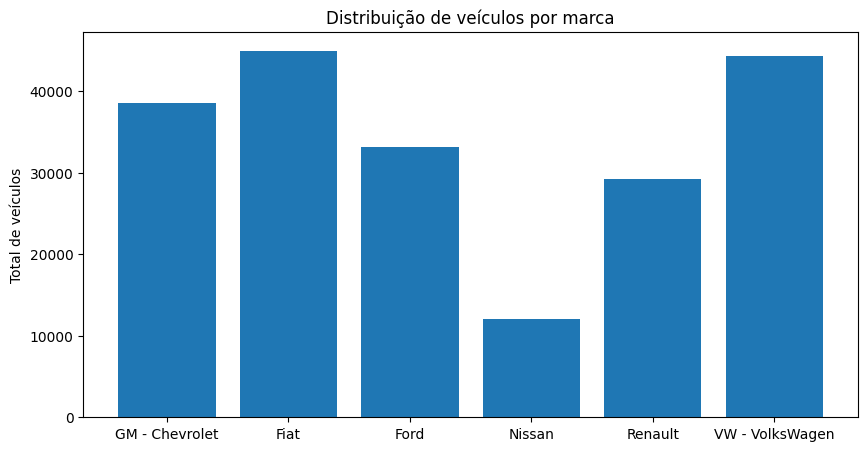

In [90]:
plt.figure(figsize=(10, 5))
plt.bar(dados.brand.unique(), dados.brand.value_counts()[dados.brand.unique()])
plt.title('Distribuição de veículos por marca')
plt.ylabel('Total de veículos');

b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do
carro


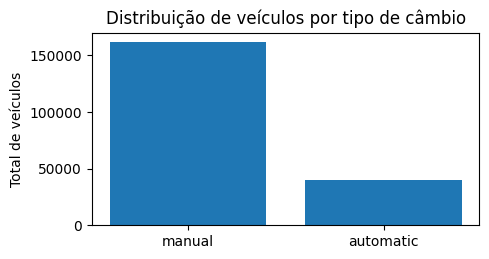

In [91]:
plt.figure(figsize=(5, 2.5))
plt.bar(dados.gear.unique(), dados.gear.value_counts()[dados.gear.unique()])
plt.title('Distribuição de veículos por tipo de câmbio')
plt.ylabel('Total de veículos');

c. Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de
2022 (variável de tempo no eixo X)

In [92]:
def atribui_numericos_mes(mes):
    if(mes == 'January'):
        return 1
    if(mes == 'February'):
        return 2
    if(mes == 'March'):
        return 3
    if(mes == 'April'):
        return 4
    if(mes == 'May'):
        return 5
    if(mes == 'June'):
        return 6
    if(mes == 'July'):
        return 7
    if(mes == 'August'):
        return 8
    if(mes == 'September'):
        return 9
    if(mes == 'October'):
        return 10
    if(mes == 'November'):
        return 11
    if(mes == 'December'):
        return 12
    
dados['month_of_reference'] = dados['month_of_reference'].apply(atribui_numericos_mes)
dados['month_of_reference'] = dados['month_of_reference'].astype('Int64')



In [93]:
ano2022 = dados.loc[dados.year_of_reference == 2022]
y = ano2022.groupby('month_of_reference').agg({'avg_price_brl':'mean'}).round(0)
print(y)

                    avg_price_brl
month_of_reference               
1                         54840.0
2                         55825.0
3                         56849.0
4                         57150.0
5                         57800.0
6                         58066.0
7                         57894.0
8                         57924.0
9                         58199.0
10                        58227.0
11                        58216.0
12                        57997.0


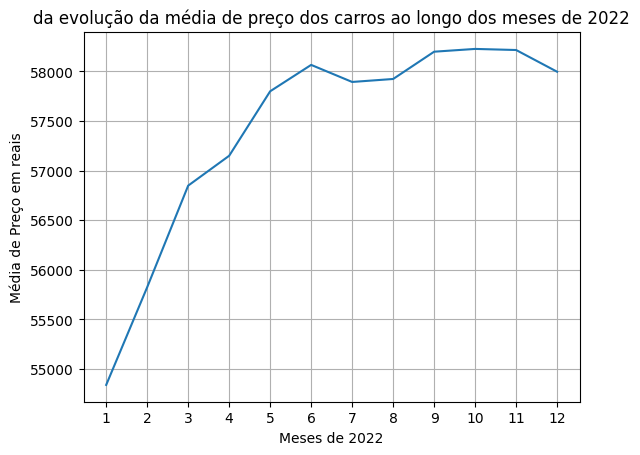

In [94]:
ano2022 = dados.loc[dados.year_of_reference == 2022]
y = ano2022.groupby('month_of_reference')['avg_price_brl'].mean().round(0)

#print(y)
plt.plot(y)
plt.grid()
plt.xticks(range(1,13))
plt.title('da evolução da média de preço dos carros ao longo dos meses de 2022')
plt.ylabel('Média de Preço em reais');
plt.xlabel('Meses de 2022')

plt.show()


d. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

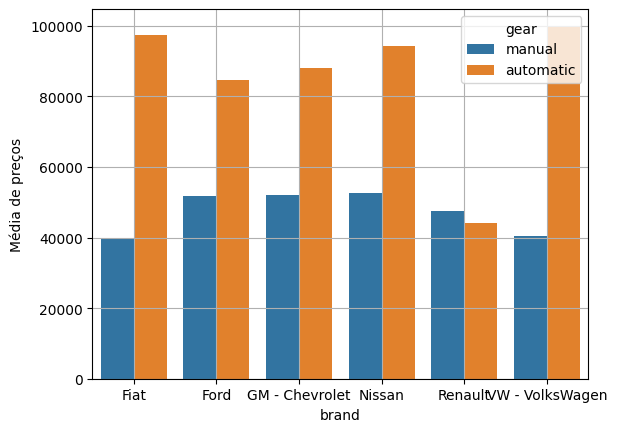

In [95]:
media_marcas_cambio = dados.groupby(['brand','gear'])['avg_price_brl'].mean().round(0)


media_marcas_cambio = media_marcas_cambio.reset_index(name = 'Média de preços')
#print(media_marcas)

sns.barplot(x='brand', y='Média de preços', hue='gear', data=media_marcas_cambio, hue_order=['manual', 'automatic'])
plt.grid()
plt.show()

e. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no
item d

f. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

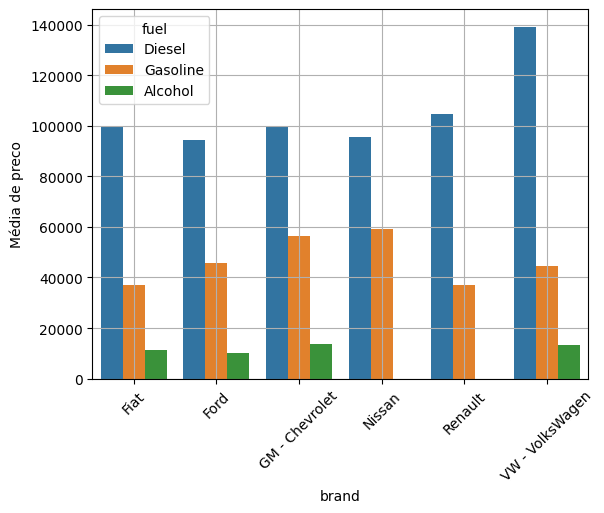

In [96]:
media_marcas_combustivel = dados.groupby(['brand','fuel'])['avg_price_brl'].mean().round(0)


media_marcas_combustivel = media_marcas_combustivel.reset_index(name = 'Média de preco')
#print(media_marcas)

sns.barplot(x='brand', y='Média de preco', hue='fuel', data=media_marcas_combustivel, hue_order=['Diesel','Gasoline', 'Alcohol'])
plt.grid()
plt.xticks(rotation=45)
plt.show()

g. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no
item f

---
###  Aplicação de modelos de machine learning para prever o preço médio dos carros

a. Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis independentes do modelo.A variável target é avg_price. Observação: caso julgue necessário, faça a transformação de variáveis categóricas em variáveis numéricas para
inputar no modelo. Indique quais variáveis foram transformadas e como foram transformadas

foram transformadas: combustível, tipo de cambio (usando label encoder) e potencia do motor (usando função)

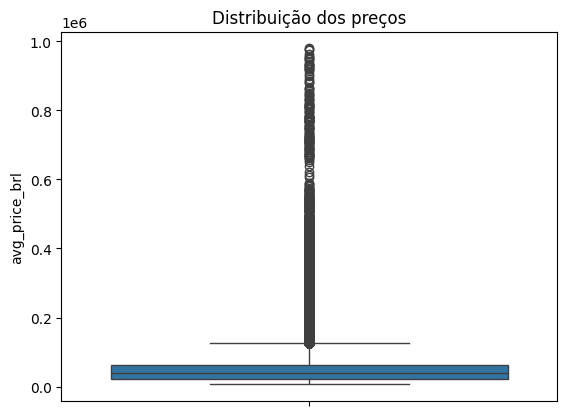

In [97]:
#teste da variável target
sns.boxplot(dados['avg_price_brl']).set_title("Distribuição dos preços");

In [98]:
dados['fuel'] = LabelEncoder().fit_transform(dados['fuel'])#transformando a coluna do tipo de combustivel e cambio
dados['gear'] = LabelEncoder().fit_transform(dados['gear'])
dados['brand'] = LabelEncoder().fit_transform(dados['brand']) 
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,1,004001-0,cfzlctzfwrcp,2,Corsa Wind 1.0 MPFI / EFI 2p,2,1,1,2002.0,9162.0
1,2021.0,1,004001-0,cdqwxwpw3y2p,2,Corsa Wind 1.0 MPFI / EFI 2p,2,1,1,2001.0,8832.0
2,2021.0,1,004001-0,cb1t3xwwj1xp,2,Corsa Wind 1.0 MPFI / EFI 2p,2,1,1,2000.0,8388.0
3,2021.0,1,004001-0,cb9gct6j65r0,2,Corsa Wind 1.0 MPFI / EFI 2p,0,1,1,2000.0,8453.0
4,2021.0,1,004003-7,g15wg0gbz1fx,2,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,2,1,"1,6",2001.0,12525.0


In [99]:
dados['engine_size'] = dados['engine_size'].astype('string')
dados['engine_size'] = dados['engine_size'].str.replace(',','.')
dados['engine_size'] = dados['engine_size'].astype('float64')



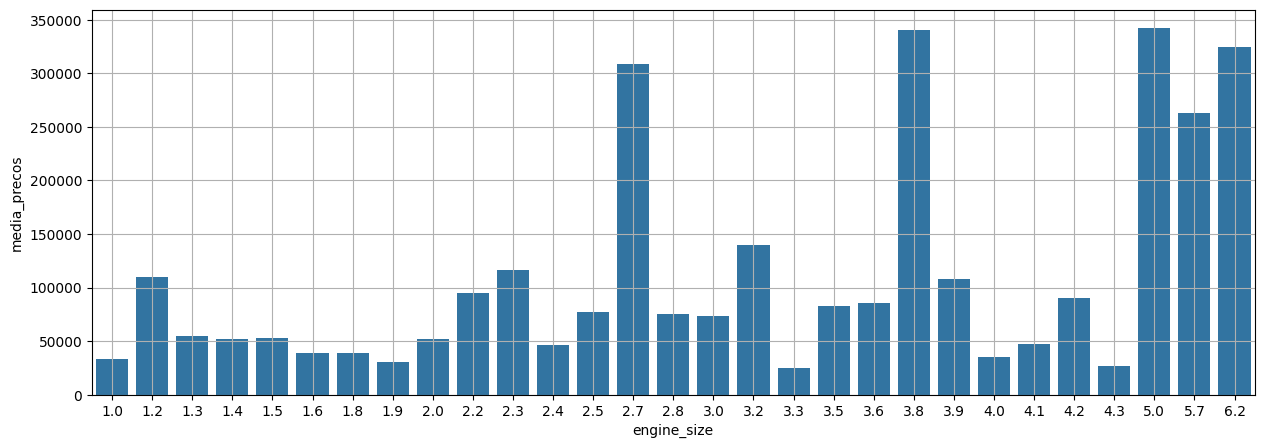

,engine_size,media_precos
0,1.0,33432.0
1,1.2,109878.0
2,1.3,54621.0
3,1.4,52098.0
4,1.5,52750.0


In [100]:
#análise de média de preço em relação à potencia do motor
plt.figure(figsize=(15, 5))

potencia_preco = dados.groupby('engine_size')['avg_price_brl'].mean().round(0)
potencia_preco = potencia_preco.reset_index(name = 'media_precos')
sns.barplot(x='engine_size', y='media_precos', data=potencia_preco)
plt.grid(axis="both")

#plt.xticks(range(1,7))
plt.show()
potencia_preco.head()


In [101]:
#criação de subdf contendo apenas os dados numericos
dados_num = dados.drop(['fipe_code','authentication','model'],axis = 1)
dados_num.head()

,year_of_reference,month_of_reference,brand,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,1,2,2,1,1.0,2002.0,9162.0
1,2021.0,1,2,2,1,1.0,2001.0,8832.0
2,2021.0,1,2,2,1,1.0,2000.0,8388.0
3,2021.0,1,2,0,1,1.0,2000.0,8453.0
4,2021.0,1,2,2,1,1.6,2001.0,12525.0


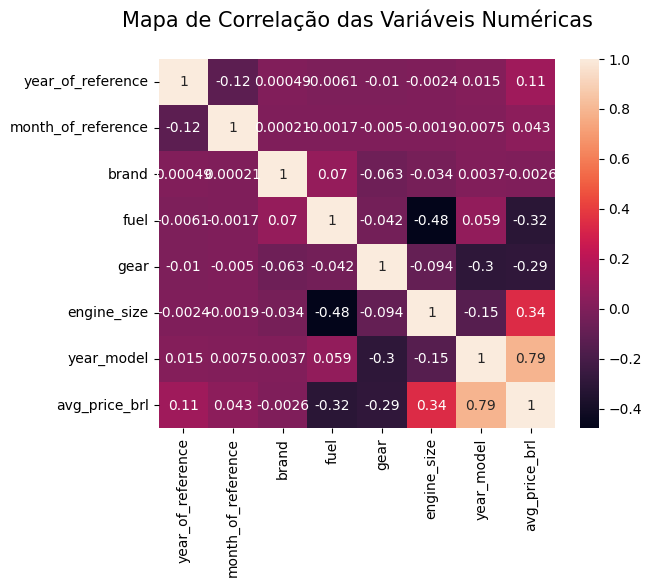

In [102]:

sns.heatmap(dados_num.corr("spearman"), annot = True)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

In [103]:
#escolha das variaveis independentes e separação da variável target

X = dados_num.drop(['avg_price_brl','month_of_reference'],axis = 1)
Y = dados_num['avg_price_brl']

b. Crie partições contendo 75% dos dados para treino e 25% para teste

In [104]:
# Divisão: 25% dos dados são de teste e 75% de treinamento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

c. Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost (biblioteca XGBRegressor) para predição dos preços dos carros. Observação: caso julgue necessário, mude os parâmetros dos modelos e rode novos modelos. Indique quais parâmetros foram inputados e indique o treinamento de cada modelo

---
##### Random Forest

In [105]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [106]:
valores_preditos_rf = model_rf.predict(X_test)
valores_preditos_rf

array([ 44862.50952612,  12791.23780572,  15373.7175747 , ...,
       116698.06591121,  16234.79802293,  21582.53643293])

In [107]:
model_rf.feature_importances_
feature_importances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.481120
year_model,0.408128
gear,0.037719
fuel,0.033373
brand,0.026030
year_of_reference,0.013630


In [108]:
mse = mean_squared_error(Y_test, valores_preditos_rf)
mae = mean_absolute_error(Y_test, valores_preditos_rf)
r2_score(Y_test, valores_preditos_rf)

0.9601965926529931

 ---
 ##### XG Boost

In [109]:
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [110]:
valores_preditos_xgboost = model_xgboost.predict(X_test)
valores_preditos_xgboost

array([ 45279.766,  12787.714,  15481.615, ..., 116875.336,  15300.347,
        21957.477], dtype=float32)

In [111]:
model_xgboost.feature_importances_
feature_importances = pd.DataFrame(model_xgboost.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.403837
year_model,0.265476
fuel,0.145049
gear,0.126034
brand,0.040007
year_of_reference,0.019598


In [112]:
mse = mean_squared_error(Y_test, valores_preditos_xgboost)
mae = mean_absolute_error(Y_test, valores_preditos_xgboost)
r2_score(Y_test, valores_preditos_xgboost)

0.9599208496123299

f. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados encontrados na análise de importância de variáveis


g. Escolha o melhor modelo com base nas métricas de avaliação MSE, MAE e R²

h. Dê uma breve explicação (máximo de quatro linhas) sobre qual modelo gerou o melhor resultado e a métrica de avaliação utilizada
